# D2Go train and convert custom model
![detection example](https://github.com/TannerGilbert/Microcontroller-Detection-with-Detectron2/blob/master/doc/detection.png?raw=1)

## Install detectron2 and d2go

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/d2go#installation). This notebook includes only what's necessary to run in Colab.

In [1]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x_06zi5k
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x_06zi5k
     |████████████████████████████████| 2.2MB 8.1MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5366882 sha256=f348eac0ce228854ab5c15db913b624fcfc6c52c8c8044a876676192903941a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-2q7s02j6/wheels/33/ac/bb/5ef90585c21c67e2f0b6aae55ec6b43017ad57af33d5f4c339
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210311-cp37-none-any.whl size=58461 sha256=8f3d3034c208d448695fc58b01c6e0a8c6000f9b6a4cb52b4919f5c84683fa23
  Stored in directory: /root/.cache/pip/wheels/bc/cc/93/e011d6b86d91631d948f9bda94d60b82b51302192eb8a688c8
  Created wheel for iopath: filename=iopath-0.1.6-cp37-none-any.whl size=18269 sha256=b2f9bb92dedb532879cce643f6a9b12763bd5

In [1]:
!pip install 'git+https://github.com/facebookresearch/mobile-vision.git'

  Cloning https://github.com/facebookresearch/mobile-vision.git to /tmp/pip-req-build-evf1v6mi
  Running command git clone -q https://github.com/facebookresearch/mobile-vision.git /tmp/pip-req-build-evf1v6mi
  Created wheel for mobile-cv: filename=mobile_cv-0.1-cp37-none-any.whl size=106683 sha256=45fa0355c531bad8d875dbc280ccf5eef8c9a6670b064677b393327aafe20b4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7yhq0_t/wheels/90/59/27/102a9a47759fb41a05d201ac5ed840625aadba2f3e506eb9e4
Successfully built mobile-cv


In [2]:
!git clone https://github.com/facebookresearch/d2go
%cd d2go
!pip install .
%cd /content

Cloning into 'd2go'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 340 (delta 6), reused 12 (delta 2), pack-reused 316
Receiving objects: 100% (340/340), 1.21 MiB | 23.44 MiB/s, done.
Resolving deltas: 100% (100/100), done.
/content/d2go
Processing /content/d2go
     |████████████████████████████████| 829kB 12.7MB/s 
     |████████████████████████████████| 112kB 34.0MB/s 
     |████████████████████████████████| 276kB 36.3MB/s 
     |████████████████████████████████| 829kB 33.8MB/s 
     |████████████████████████████████| 1.3MB 53.5MB/s 
     |████████████████████████████████| 296kB 56.3MB/s 
     |████████████████████████████████| 143kB 54.7MB/s 
  Created wheel for d2go: filename=d2go-0.0.1b20210313-cp37-none-any.whl size=187431 sha256=835bae5a46df20b3b9131cda19255ab059b6b197d016c2f0d7bafcf397854ebc
  Stored in directory: /tmp/pip-ephem-wheel-cache-47ekcirw/wheels/c7/0a/82/69c335a9f

## Get data

In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

Before we can start training our model we need to download our data-set. In this case we will use my microcontroller detection data-set, which is [available on Kaggle](https://www.kaggle.com/tannergi/microcontroller-detection).

In [4]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 4.2MB 13.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 143kB 55.3MB/s 
     |████████████████████████████████| 112kB 54.5MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-aeq7vy8f/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-aeq7vy8f/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-u3esddgr/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


If you are working in Colab you need to add the username and key contained in your kaggle.json file to your environment using os.

In [5]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [6]:
!kaggle datasets download -d tannergi/microcontroller-detection

 60% 5.00M/8.34M [00:00<00:00, 31.5MB/s]
100% 8.34M/8.34M [00:00<00:00, 41.0MB/s]


In [7]:
!unzip microcontroller-detection.zip

Archive:  microcontroller-detection.zip
  inflating: Microcontroller Detection/test/IMG_20181228_102636.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102636.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102641.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102641.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102658.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102658.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102706.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102706.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102745.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102745.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102749.jpg  
  inflating: Microcontroller Detection/test/IMG_20181228_102749.xml  
  inflating: Microcontroller Detection/test/IMG_20181228_102757.jpg  
  inflating: Microcontroller Detection/test/IMG_20

In [8]:
import pandas as pd

df = pd.read_csv('Microcontroller Detection/train_labels.csv')

df.head()

filename  width  height  ... ymin  xmax  ymax
0  IMG_20181228_101826.jpg    800     600  ...  265   556   342
1  IMG_20181228_101855.jpg    800     600  ...  243   592   382
2  IMG_20181228_101903.jpg    800     600  ...  239   514   387
3  IMG_20181228_101915.jpg    800     600  ...  200   669   531
4  IMG_20181228_102013.jpg    800     600  ...  336   591   444

[5 rows x 8 columns]

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the [official documentation](https://detectron2.readthedocs.io/tutorials/datasets.html#register-a-dataset).

In [9]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2

# write a function that loads the dataset into detectron2's standard format
def get_microcontroller_dicts(csv_file, img_dir):
    df = pd.read_csv(csv_file)
    df['filename'] = df['filename'].map(lambda x: img_dir+x)

    classes = ['Raspberry_Pi_3', 'Arduino_Nano', 'ESP8266', 'Heltec_ESP32_Lora']

    df['class_int'] = df['class'].map(lambda x: classes.index(x))

    dataset_dicts = []
    for idx, filename in enumerate(df['filename'].unique().tolist()):
        record = {}
        
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["height"] = height
        record["width"] = width
        record["image_id"] = idx

        objs = []
        for index, row in df[(df['filename']==filename)].iterrows():
          obj= {
              'bbox': [row['xmin'], row['ymin'], row['xmax'], row['ymax']],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': row['class_int'],
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [10]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ['Raspberry_Pi_3', 'Arduino_Nano', 'ESP8266', 'Heltec_ESP32_Lora']

for d in ["train", "test"]:
  DatasetCatalog.register('microcontroller_' + d, lambda d=d: get_microcontroller_dicts('Microcontroller Detection/' + d + '_labels.csv', 'Microcontroller Detection/' + d+'/'))
  MetadataCatalog.get('microcontroller_' + d).set(thing_classes=classes, evaluator_type="coco")
microcontroller_metadata = MetadataCatalog.get('microcontroller_train')

We can check if our code works correctly by plotting a few images.

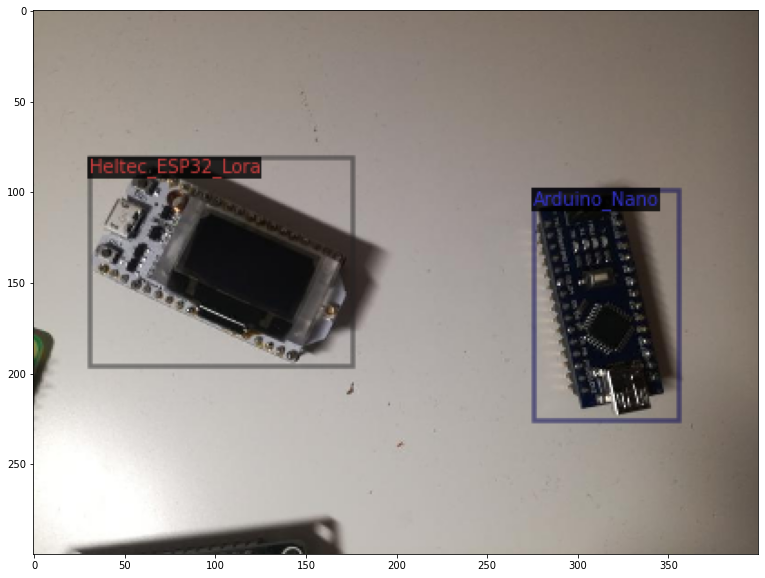

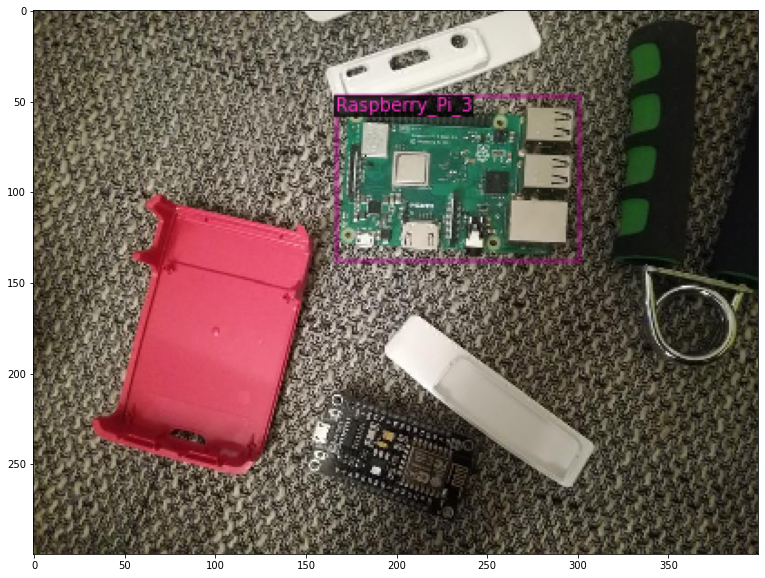

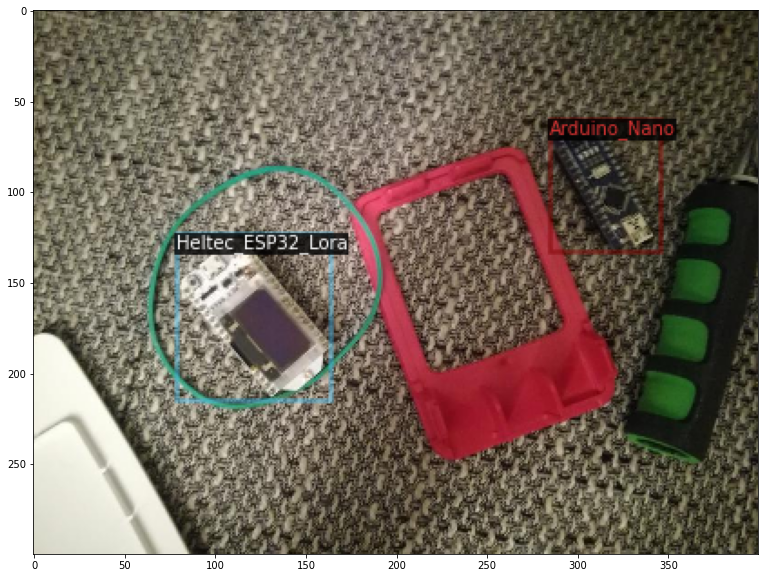

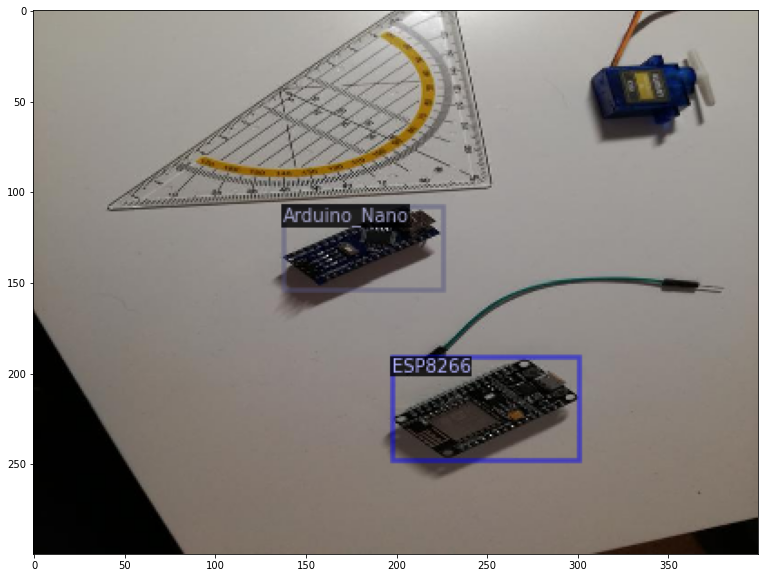

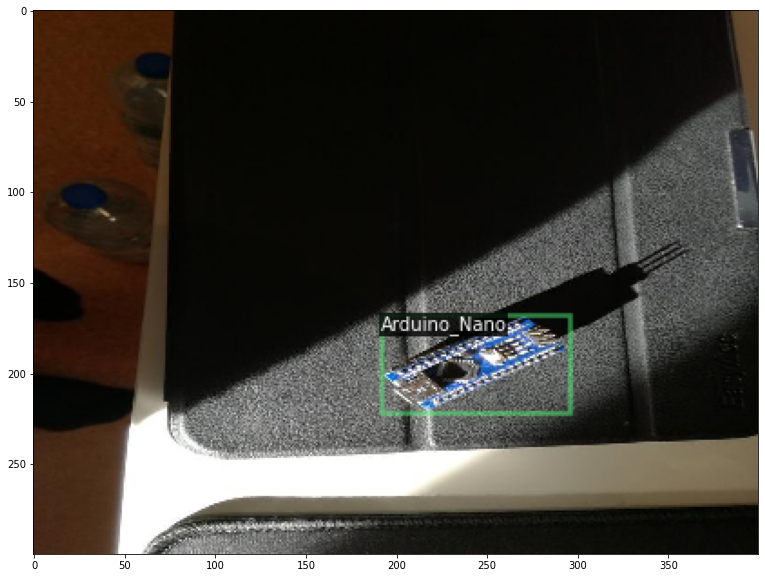

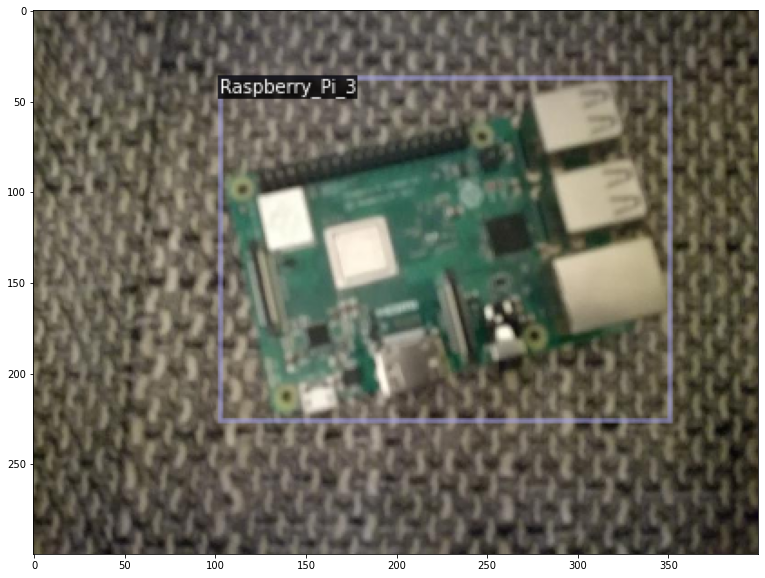

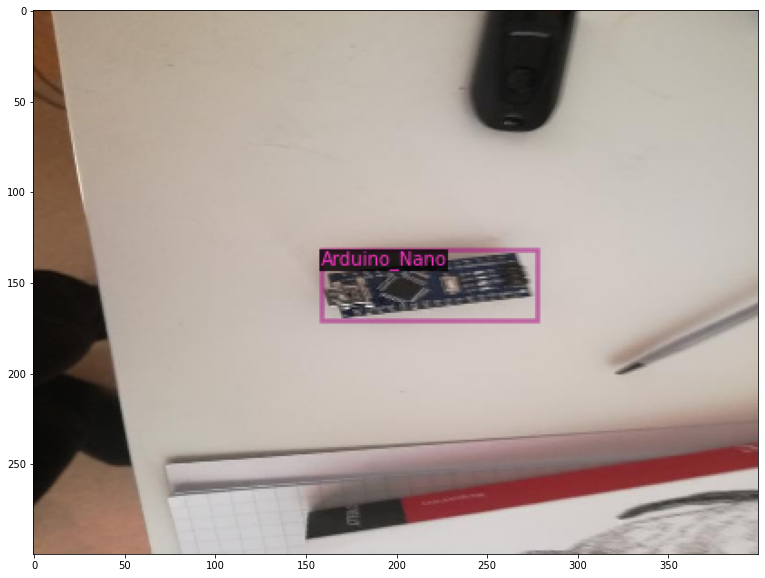

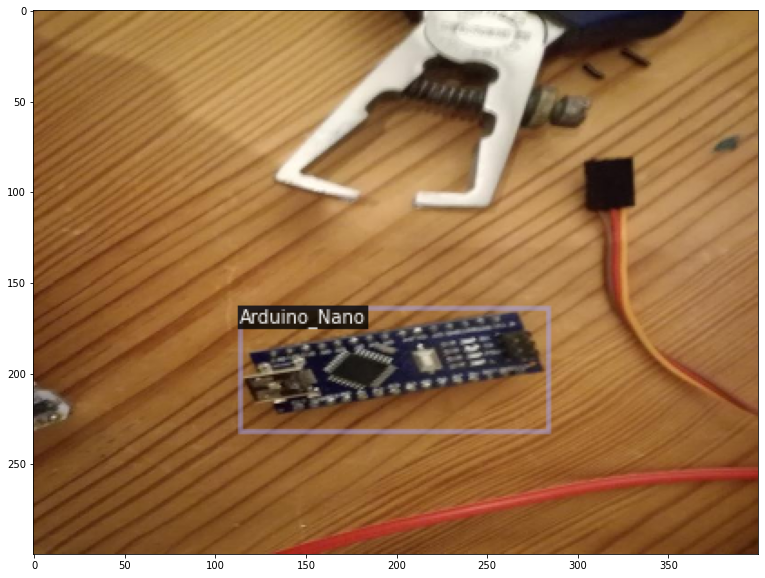

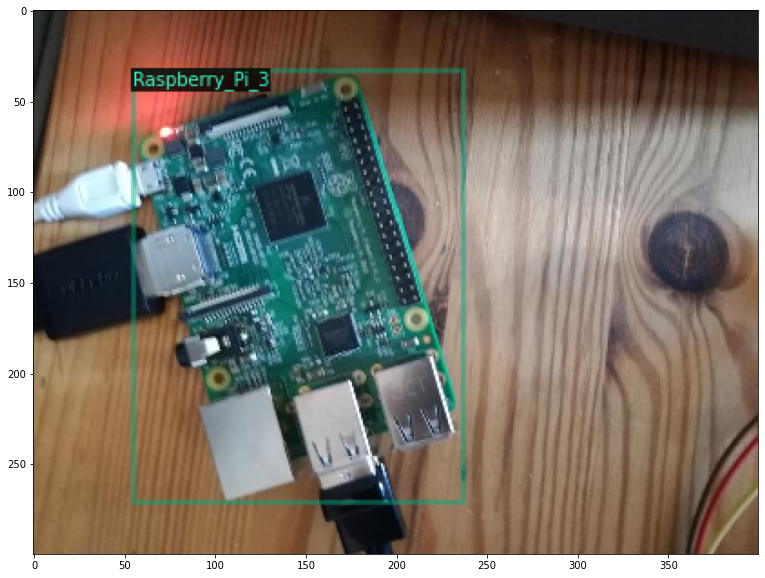

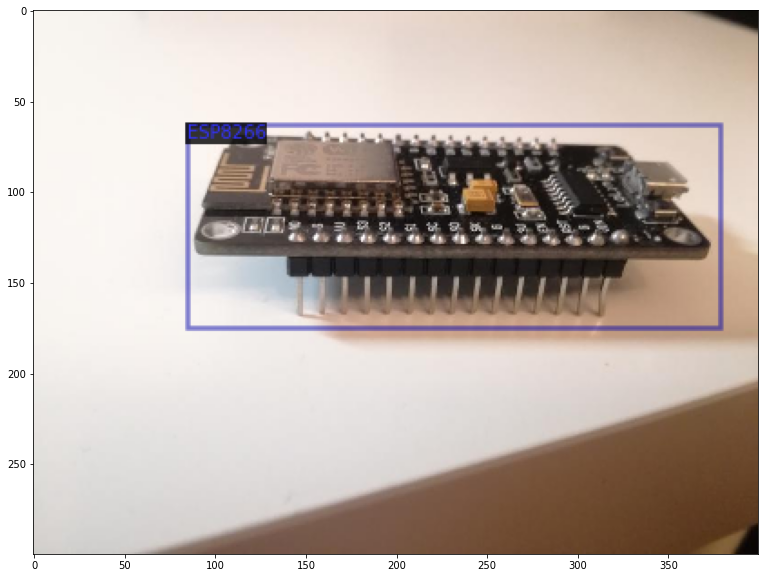

In [11]:
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

Now, let's fine-tune a pretrained FasterRCNN object detection model to detect the different microcontrollers.

In [12]:
from d2go.runner import Detectron2GoRunner
from d2go.model_zoo import model_zoo

def prepare_for_launch():
    runner = Detectron2GoRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("faster_rcnn_fbnetv3a_C4.yaml"))
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATASETS.TRAIN = ("microcontroller_train",)
    cfg.DATASETS.TEST = ("microcontroller_test",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("faster_rcnn_fbnetv3a_C4.yaml")
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.01
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []        # do not decay learning rate   
    cfg.SOLVER.WARMUP_ITERS = 1500  
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=False)

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d
model_0479999.pth: 64.4MB [00:01, 35.4MB/s]                            
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 200) in the checkpoint but (5, 200) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 200) in the checkpoint but (16, 200) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predicto

[03/13 20:25:52 d2.data.build]: Removed 0 images with no usable annotations. 142 images left.
[03/13 20:25:52 d2.data.build]: Distribution of instances among all 4 categories:
|   category    | #instances   |   category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:----------:|:-------------|
| Raspberry_P.. | 42           | Arduino_Nano | 41           |  ESP8266   | 45           |
| Heltec_ESP3.. | 42           |              |              |            |              |
|     total     | 170          |              |              |            |              |
[03/13 20:25:52 d2.data.build]: Using training sampler TrainingSampler
[03/13 20:25:52 d2.data.common]: Serializing 142 elements to byte tensors and concatenating them all ...
[03/13 20:25:52 d2.data.common]: Serialized dataset takes 0.04 MiB
[03/13 20:25:54 d2.engine.train_loop]: Starting training from iteration 0
[03/13 20:25:59 d2.utils.events]:  eta: 0:03:48  ite

{'model_final': CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './output/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'FBNetV2C4Backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': [], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 64, 96, 128, 160]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'FBNetV2RpnHead', 'IN_FEATURES': ['trunk3'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_LOSS_TYPE': 'smooth_l1', 'BBOX_REG_LOSS_WEIGHT': 1.0, 'BBOX_REG_WEIGHTS': (1.0, 1.0, 1.0, 1.0)

In [13]:
!ls -lah {os.path.join(cfg.OUTPUT_DIR, "model_final.pth")}

-rw-r--r-- 1 root root 41M Mar 13 20:29 ./output/model_final.pth


## Inference & evaluation using the trained model

Now, let's run inference with the trained model on the microcontroller validation dataset.

In [14]:
metrics = runner.do_test(cfg, model)

[03/13 20:29:58 d2.data.common]: Serializing 7 elements to byte tensors and concatenating them all ...
[03/13 20:29:58 d2.data.common]: Serialized dataset takes 0.00 MiB
[03/13 20:29:58 d2.evaluation.evaluator]: Start inference on 7 images
[03/13 20:30:02 d2.evaluation.evaluator]: Total inference time: 0:00:01.071210 (0.535605 s / img per device, on 1 devices)
[03/13 20:30:02 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.019549 s / img per device, on 1 devices)
[03/13 20:30:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/13 20:30:02 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/default/final/microcontroller_test/coco_instances_results.json
[03/13 20:30:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[03/13 20:30:02 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/13 20:30:02 

The evaluation results are

In [15]:
print(metrics)

OrderedDict([('default', OrderedDict([('microcontroller_test', OrderedDict([('bbox', {'AP': 79.66171617161716, 'AP50': 95.87458745874588, 'AP75': 95.87458745874588, 'APs': nan, 'APm': nan, 'APl': 79.66171617161716, 'AP-Raspberry_Pi_3': 90.0, 'AP-Arduino_Nano': 80.0990099009901, 'AP-ESP8266': 80.0, 'AP-Heltec_ESP32_Lora': 68.54785478547855})]))]))])


## Make predictions with Detectron2 model

In [16]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d


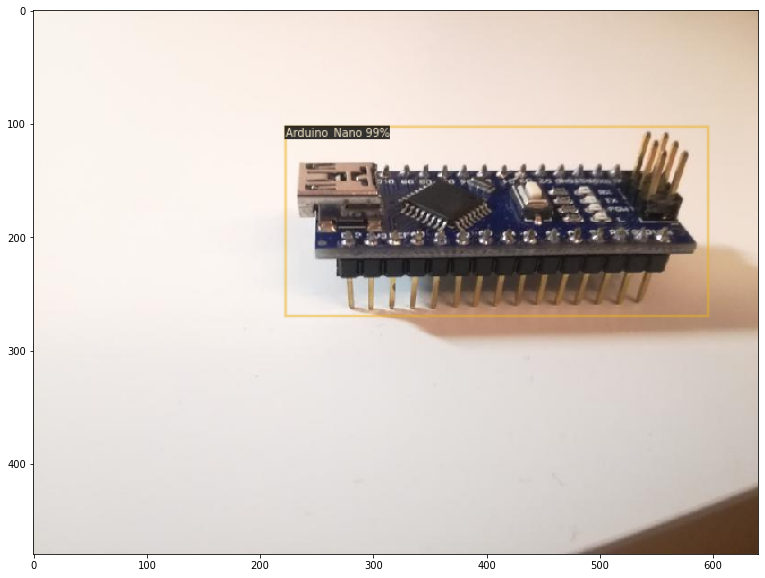

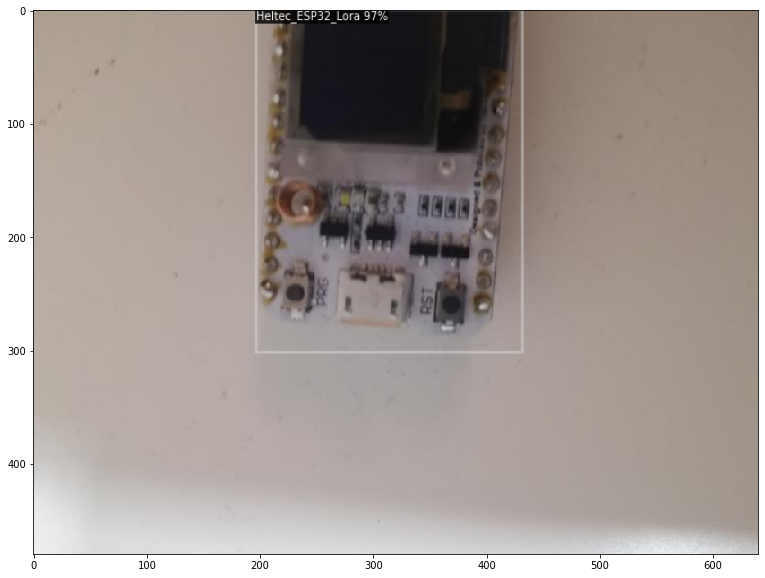

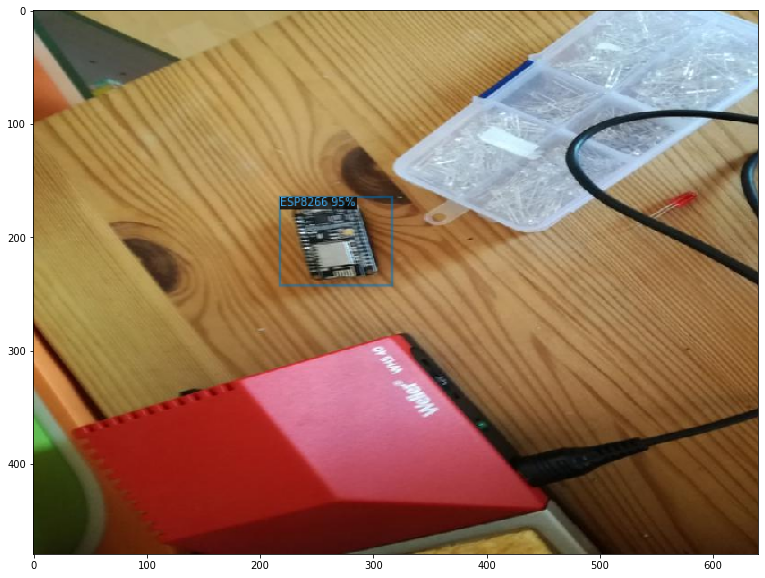

In [17]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=microcontroller_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Export to Int8 Model
This section export int8 models using post-training quantization. For quantization-aware training, please see the [instructions](https://github.com/facebookresearch/d2go/tree/master/demo#quantization-aware-training).

In [18]:
import copy
from detectron2.data import build_detection_test_loader
from d2go.export.api import convert_and_export_predictor
from d2go.export.d2_meta_arch import patch_d2_meta_arch

import logging

# disable all the warnings
previous_level = logging.root.manager.disable
logging.disable(logging.INFO)

patch_d2_meta_arch()

pytorch_model = runner.build_model(cfg, eval_only=True)
pytorch_model.cpu()

datasets = cfg.DATASETS.TRAIN[0]
data_loader = runner.build_detection_test_loader(cfg, datasets)

predictor_path = convert_and_export_predictor(
  copy.deepcopy(cfg),
  copy.deepcopy(pytorch_model),
  "torchscript_int8@tracing",
  './',
  data_loader
)

# recover the logging level
logging.disable(previous_level)

Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d
/usr/local/lib/python3.7/dist-packages/torch/quantization/observer.py:123: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  reduce_range will be deprecated in a future release of PyTorch."
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:92: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert t.shape[:-2] == tensors[0].shape[:-2], t.shape
/usr/local/lib/python3.7/dist-packages/detectron2/structures/boxes.py:158: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you us

In [19]:
!ls -lah {predictor_path}

total 7.5M
drwxr-xr-x 2 root root 4.0K Mar 13 20:30 .
drwxr-xr-x 1 root root 4.0K Mar 13 20:30 ..
-rw-r--r-- 1 root root 786K Mar 13 20:30 data.pth
-rw-r--r-- 1 root root 6.8M Mar 13 20:30 model.jit
-rw-r--r-- 1 root root  924 Mar 13 20:30 predictor_info.json


Create the predictor using the exported int8 model

In [20]:
from mobile_cv.predictor.api import create_predictor
model = create_predictor(predictor_path)

Make predictions and Visualize the output

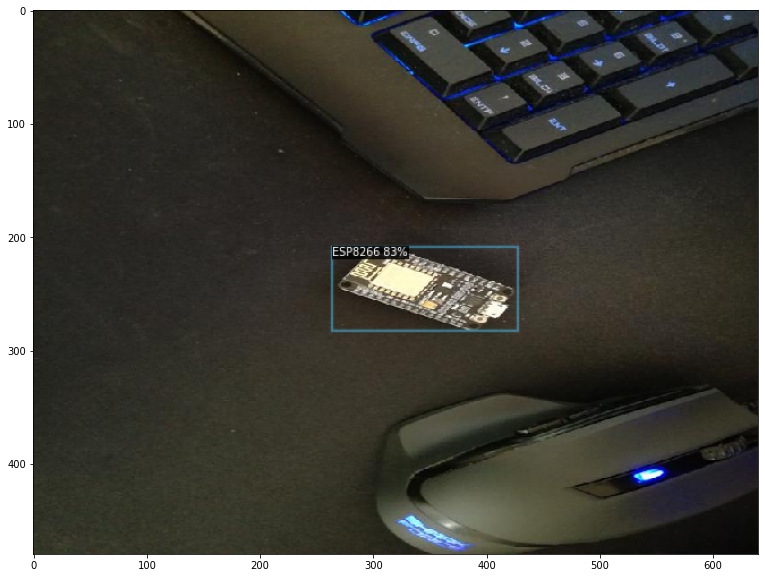

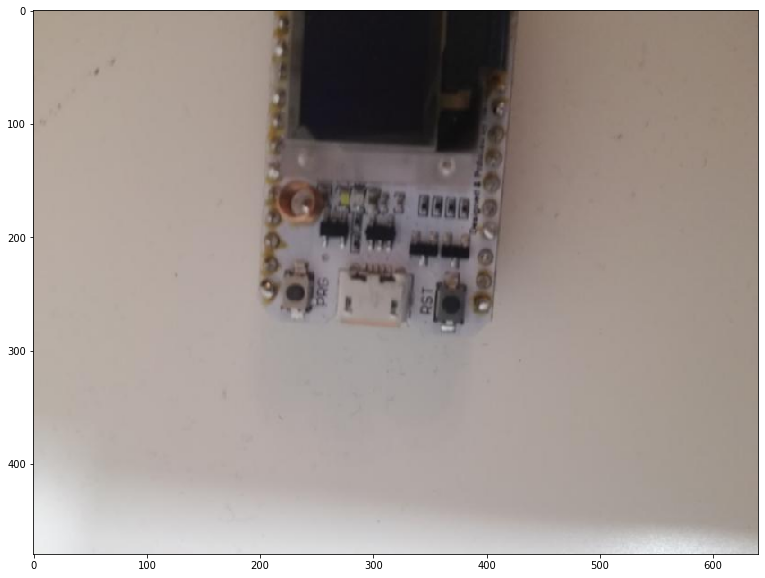

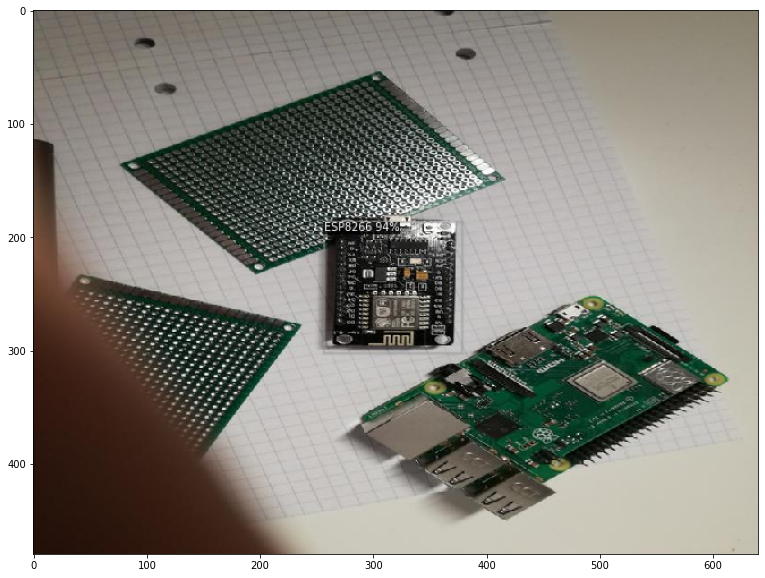

In [21]:
from d2go.utils.demo_predictor import DemoPredictor

predictor = DemoPredictor(model)

dataset_dicts = DatasetCatalog.get('microcontroller_train')
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=microcontroller_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()